<a href="https://colab.research.google.com/github/AsmaBenHmidene/Thyroid-disease-medical-diagnosis-prediction/blob/main/Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thyroid disease medical diagnosis prediction:

1. Source of data

Thyroid Data - https://archive.ics.uci.edu/ml/datasets/thyroid+disease ,
https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data ,
https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data

2. Brief description of data

The datasets featured were created by reconciling thyroid disease datasets provided by the UCI Machine Learning Repository of patient background information and blood test results along with thyroid-related medical diagnosis

3. What is the target?

target - hyperthyroidism medical diagnosis (str).

    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of comments.

Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones


4. What does one row represent? (A person? A business? An event? A product?)

a person

5. Is this a classification or regression problem?

classification problem.

6. How many features does the data have?

30 features.

7. How many rows are in the dataset?

9172 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

many missing values in multiple columns.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data from file structure
filename2 = '/content/drive/MyDrive/Coding Dojo/Project 2/project 2 multi classification/thyroidDF.csv'
df = pd.read_csv(filename2)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


# cleaning:

drop no needed column:

In [5]:
df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,S


1. duplicates:

In [6]:
df.duplicated().sum()

10

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

2. data types:

In [8]:
df.dtypes

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
FTI                    float64
TBG                    float64
target                  object
dtype: object

3. Impossible values in numeric columns:

In [9]:
df.select_dtypes('number').describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9162.000000,8328.000000,6566.000000,8728.000000,8361.000000,8368.000000,341.000000
mean,73.581205,5.219434,1.970650,108.704017,0.976067,113.643528,29.978446
std,1184.622352,24.186817,0.887711,37.525337,0.200377,41.553807,21.304559
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.070000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


Max age is impossible value.

In [10]:
num_columns= df.select_dtypes('number')
for column in num_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

age : [   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]
TSH : [3.0000000e-01 1.6000000e+00           nan 7.0000000e-01 1.2000000e+00
 1.9000000e+00 1.0000000e+00 5.0000000e-01 2.6000000e+00 6.8000000e+01
 1.5000000e+00 5.9000000e+00 5.0000000e-02 4.0000000e+00 4.0000000e-01
 8.0000000e-01 2.0000000e-01 3.0000000e+00 9.5999990e+00 1.4000000e+02
 6.0000000e-01 1.7000000e+00 2.5000000e+00 6.8000000e+00 2.1000000e+00
 1.1000000e+00 9.799999

In [11]:
df['age'] = df['age'].replace(65511,11, regex=True).replace(65512,12, regex=True).replace(65526,26, regex=True).replace(455,45, regex=True)

In [12]:
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 75, 56,
       85, 71, 67, 55, 61, 46, 44, 82, 64, 70, 33, 59, 53, 52, 49, 35, 48,
       27, 69, 76, 73, 68, 66, 30, 88, 38, 58, 21, 45, 83, 62, 25, 86, 72,
       14, 15, 39, 26, 20, 80, 90, 23, 18, 13, 78, 24, 81, 92, 57, 74,  9,
       47, 17, 11, 50, 34,  8, 79, 31, 65, 84, 12, 10, 19, 22,  1,  2, 97,
        6, 89, 87, 93,  7, 91,  5, 94,  4, 95,  3])

4. inconsistent values in categorical columns:

In [13]:
object_columns= df.select_dtypes('object')
for column in object_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

sex : ['F' 'M' nan]
on_thyroxine : ['f' 't']
query_on_thyroxine : ['f' 't']
on_antithyroid_meds : ['f' 't']
sick : ['f' 't']
pregnant : ['f' 't']
thyroid_surgery : ['f' 't']
I131_treatment : ['f' 't']
query_hypothyroid : ['t' 'f']
query_hyperthyroid : ['f' 't']
lithium : ['f' 't']
goitre : ['f' 't']
tumor : ['f' 't']
hypopituitary : ['f' 't']
psych : ['f' 't']
target : ['-' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q' 'J' 'C|I'
 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI' 'D|R' 'E']


5. NaN values:

In [14]:
df.isna().sum()

age                       0
sex                     306
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     834
T3                     2596
TT4                     434
T4U                     801
FTI                     794
TBG                    8821
target                    0
dtype: int64

There are missing value in TSH , T3, TT4, T4U, FTI and TBG. All of them are numerical columns. For object columns, there is missing values in sex column.

In [15]:
df.drop(['TBG'], axis=1, inplace=True)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128.0,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S


We will use Exploratory Visualizations to determine the best imputation method for the numerical columns.

In [16]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

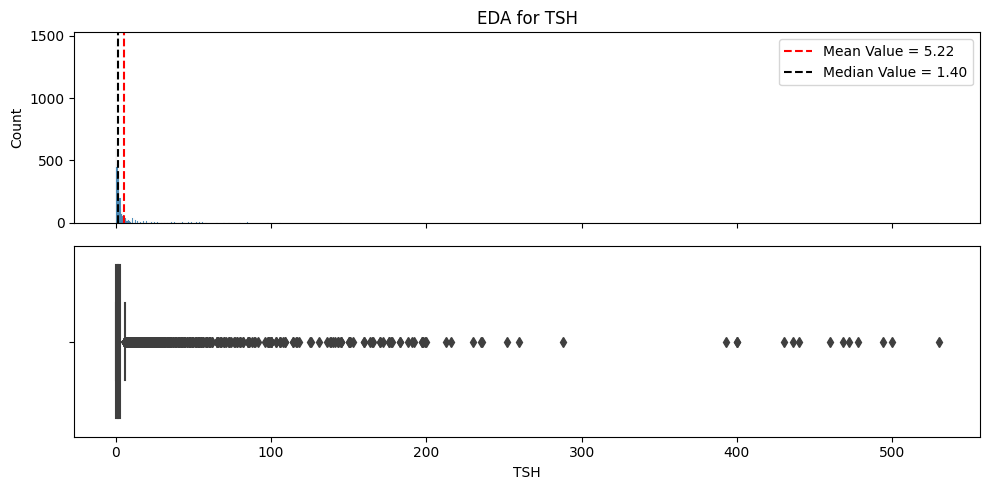

In [17]:
plot_numeric(df,"TSH")

The distribution is skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [18]:
df['TSH'].fillna(df['TSH'].median(), inplace = True)
df['TSH'].isna().sum()

0

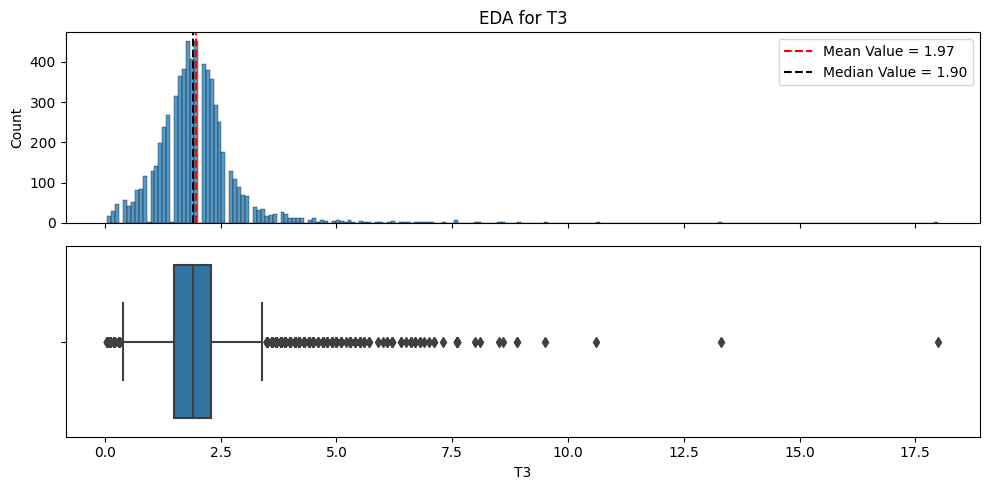

In [19]:
plot_numeric(df,"T3")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [20]:
df['T3'].fillna(df['T3'].mean(), inplace = True)
df['T3'].isna().sum()

0

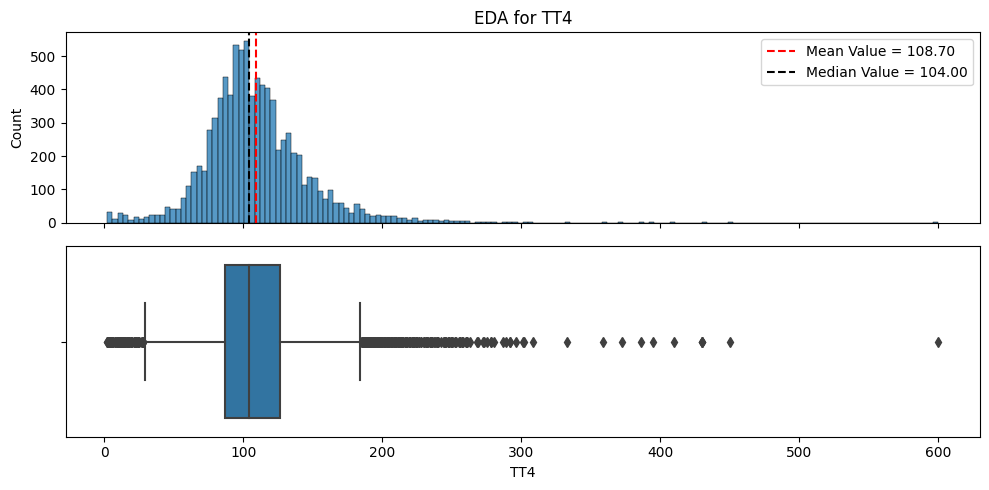

In [21]:
plot_numeric(df, "TT4")

The distribution is slightly skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [22]:
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['TT4'].isna().sum()

0

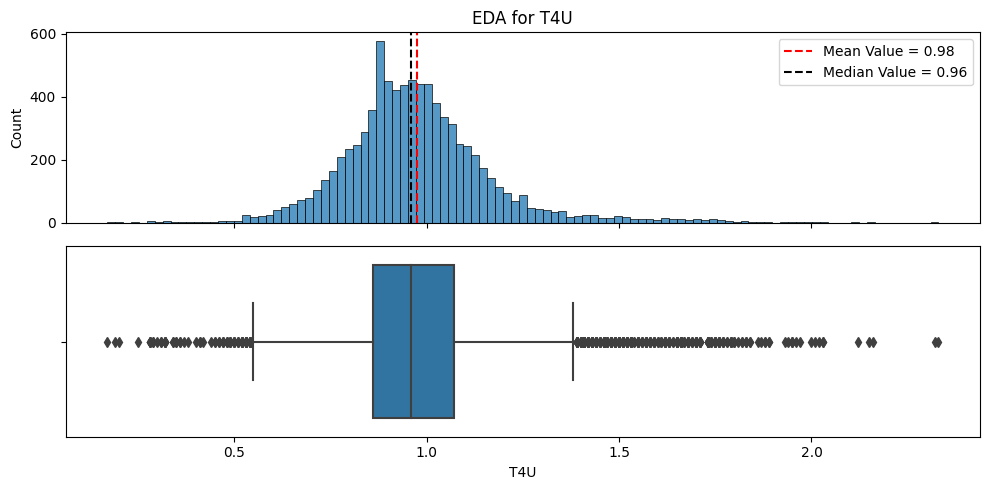

In [23]:
plot_numeric(df,"T4U")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [24]:
df['T4U'].fillna(df['T4U'].mean(), inplace = True)
df['T4U'].isna().sum()

0

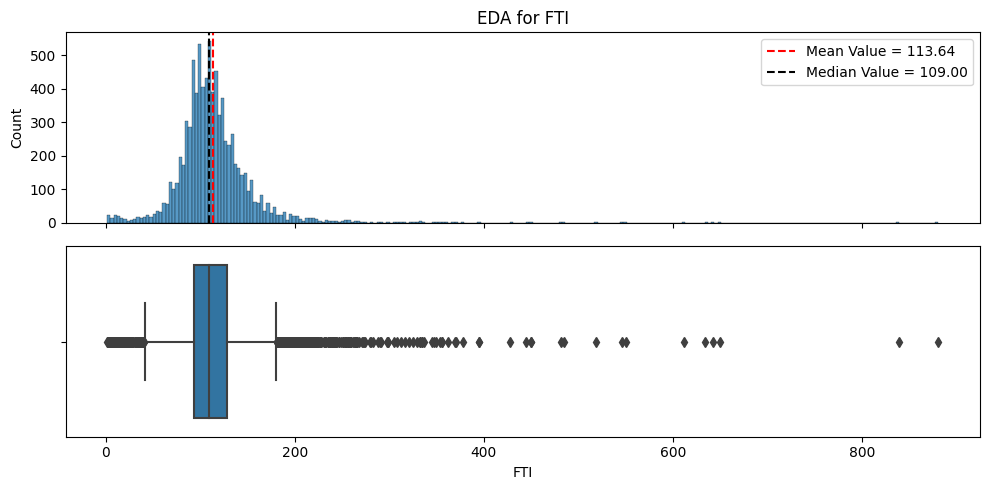

In [25]:
plot_numeric(df,"FTI")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [26]:
df['FTI'].fillna(df['FTI'].mean(), inplace = True)
df['FTI'].isna().sum()

0

We will impute missing value in Sex column with the most frequent category.

In [27]:
df['sex'].value_counts()

F    6064
M    2792
Name: sex, dtype: int64

In [28]:
df['sex'].fillna('F', inplace = True)
df['sex'].isna().sum()

0

In [29]:
df.isna().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

6. Dataset balance:

In [30]:
df['target'].value_counts()

-      6763
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        83
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

# Pre-processing:

In [31]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
df['target'] = df['target'].map(mapping)

In [32]:
df.dropna(subset=['target'], inplace=True)

In [33]:
df['target'].value_counts()

Negative        6763
Hypothyroid      667
Hyperthyroid     241
Name: target, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target']=le.fit_transform(df['target'])
df['target'].value_counts()

2    6763
1     667
0     241
Name: target, dtype: int64

In [35]:
#Identify the features (X) and target (y)
y = df['target']
X = df.drop(columns=['target'])

In [36]:
#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
3618,91,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.150,1.3,126.0,0.960000,132.000000
6847,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.085,2.2,130.0,0.910000,143.000000
16,54,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.000,2.0,122.0,0.976067,113.643528
8323,30,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,15.000,5.6,278.0,0.780000,356.000000
6860,66,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.900,2.2,135.0,1.070000,126.000000


In [37]:
#Create list of column names for numeric columns
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
scaler = StandardScaler()

Numeric Columns: Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')


In [38]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', scaler, num_cols)
num_tuple

('numeric',
 StandardScaler(),
 Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object'))

In [39]:
obj_cols = X_train.select_dtypes("object").columns
print("Object Columns:", obj_cols)

Object Columns: Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych'],
      dtype='object')


In [40]:
nomi_cols = X_train.select_dtypes("object").columns
# Instantiate the individual preprocessors
nomi_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
nomi_pipe = make_pipeline(nomi_encoder)
nomi_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [41]:
# Making a ohe_tuple for ColumnTransformer
nomi_tuple = ('nomi categorical', nomi_pipe, nomi_cols)
nomi_tuple

('nomi categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds',
        'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
        'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
        'hypopituitary', 'psych'],
       dtype='object'))

In [42]:
#Instantiate the ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, nomi_tuple], remainder='passthrough', verbose_feature_names_out=False)

In [43]:
#Fit the Transformer on Training Data Only
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')),
                                ('nomi categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [44]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_meds_f,on_antithyroid_meds_t,sick_f,sick_t,pregnant_f,pregnant_t,thyroid_surgery_f,thyroid_surgery_t,I131_treatment_f,I131_treatment_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,lithium_f,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t,hypopituitary_f,psych_f,psych_t
3618,2.080955,-0.198978,-0.996818,0.626221,-0.056283,0.580206,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
6847,-0.920675,-0.201586,0.288182,0.750229,-0.375781,0.891640,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
16,0.097735,-0.164878,0.002626,0.502212,0.046382,0.060493,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
8323,-1.188678,0.396771,5.142625,5.338537,-1.206476,6.922144,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
6860,0.740941,-0.128772,0.288182,0.905239,0.646612,0.410333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


# Prediction Models:

## eXtreme Gradient Boosting: Model 1

In [45]:
%%time
xgb = XGBClassifier()
xgb_pipe = make_pipeline(xgb)
xgb_pipe.fit(X_train_processed, y_train)

CPU times: user 682 ms, sys: 6.97 ms, total: 689 ms
Wall time: 386 ms


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

## LightGBM: Model2

In [46]:
%%time
lgbm = LGBMClassifier()
lgbm_pipe = make_pipeline(lgbm)
lgbm_pipe.fit(X_train_processed, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 5753, number of used features: 34
[LightGBM] [Info] Start training from score -3.447991
[LightGBM] [Info] Start training from score -2.440871
[LightGBM] [Info] Start training from score -0.126578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: user 360 ms, sys: 15.1 ms, total: 375 ms
Wall time: 415 ms


Pipeline(steps=[('lgbmclassifier', LGBMClassifier())])

## GradientBoostingClassifier: Model3

In [47]:
%%time
gbc = GradientBoostingClassifier()
gbc_pipe = make_pipeline(gbc)
gbc_pipe.fit(X_train_processed, y_train)

CPU times: user 2.9 s, sys: 5.55 ms, total: 2.91 s
Wall time: 2.93 s


Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())])

# Evaluation:

In [48]:
# XGBoost
xgb_predict = xgb_pipe.predict(X_test_processed)
print('XGB Classification Report')
print(classification_report(y_test, xgb_predict))
print('-'*80)

# LightGBM
lgbm_predict = lgbm_pipe.predict(X_test_processed)
print('LightGBM Classification Report:\n', classification_report(y_test, lgbm_predict))
print('-'*80)

# GradientBoostingClassifier
gbc_predict = gbc_pipe.predict(X_test_processed)
print('GradientBoosting Classification Report:\n', classification_report(y_test, gbc_predict))
print('-'*80)

XGB Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        58
           1       0.96      0.96      0.96       166
           2       0.99      0.99      0.99      1694

    accuracy                           0.98      1918
   macro avg       0.92      0.90      0.91      1918
weighted avg       0.98      0.98      0.98      1918

--------------------------------------------------------------------------------
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        58
           1       0.96      0.99      0.97       166
           2       0.99      0.99      0.99      1694

    accuracy                           0.99      1918
   macro avg       0.94      0.93      0.93      1918
weighted avg       0.99      0.99      0.99      1918

--------------------------------------------------------------------------------
GradientBoosting 

In [49]:
from sklearn.metrics import confusion_matrix

predictions = [xgb_predict, lgbm_predict, gbc_predict]
con_matrices = []

for i in range(len(predictions)):
  con_matrices.append(confusion_matrix(y_test, predictions[i]))

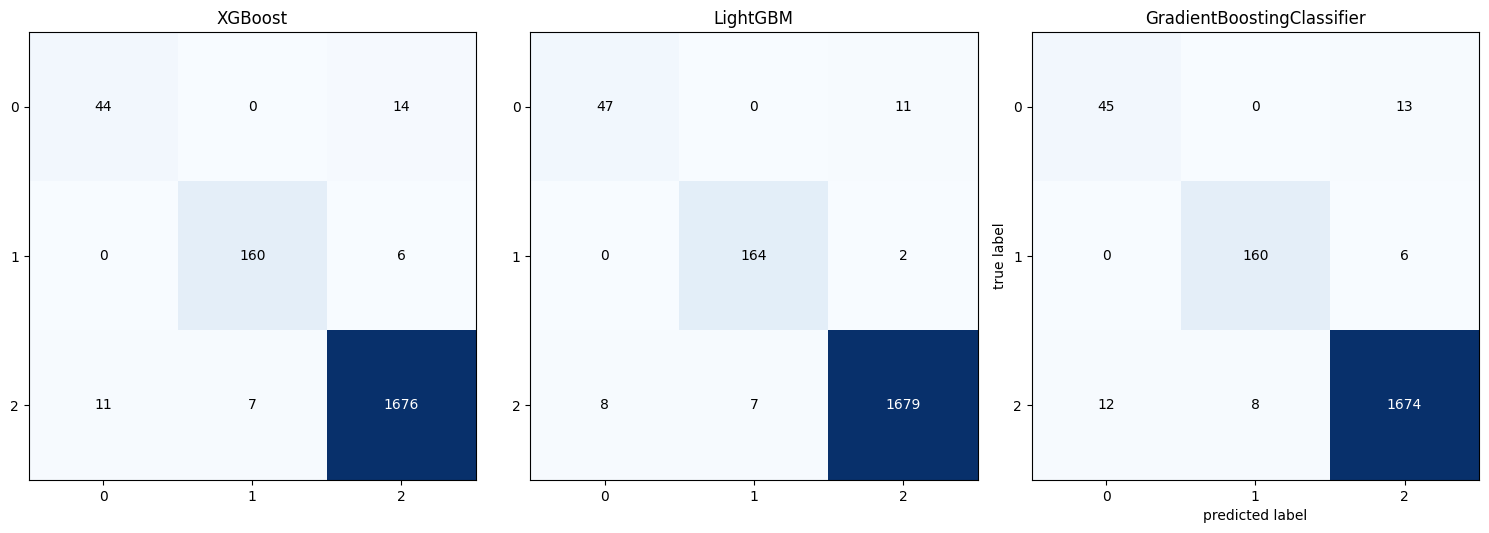

In [50]:
from mlxtend.plotting import plot_confusion_matrix

titles =['XGBoost', 'LightGBM', 'GradientBoostingClassifier']
fig, axs = plt.subplots(1, len(titles), figsize=(15, 5))

for i, ax in enumerate(axs):
    plot_confusion_matrix(con_matrices[i], axis=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

# Features importance:

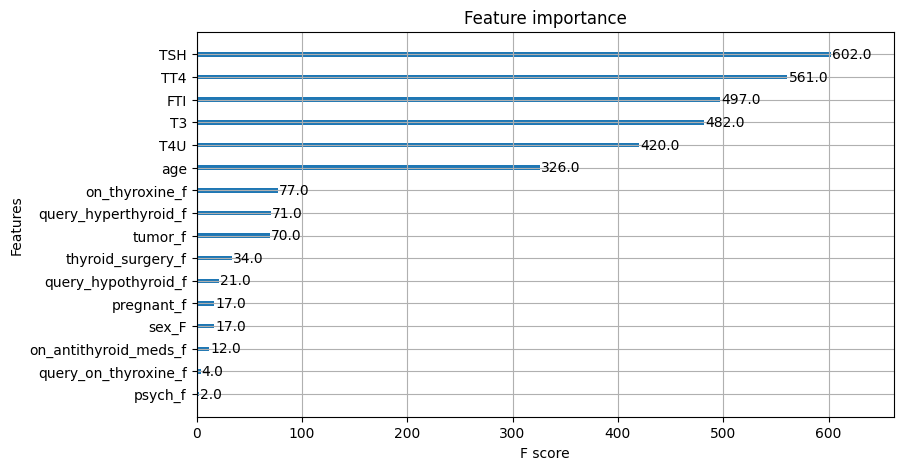

In [51]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb, ax=ax)
plt.show()

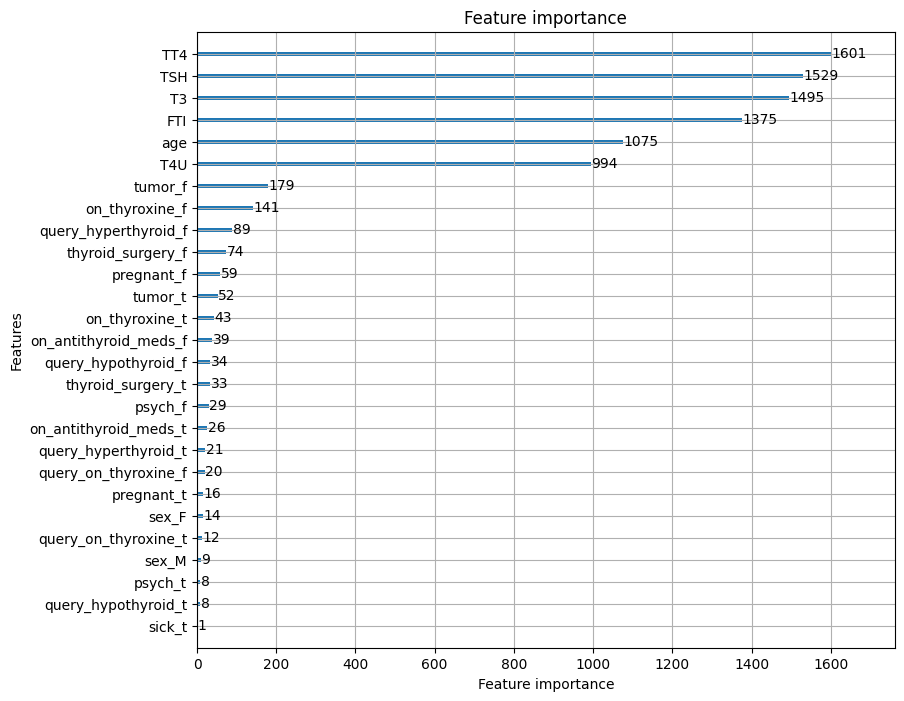

In [52]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(9,8))
plot_importance(lgbm, ax=ax)
plt.show()

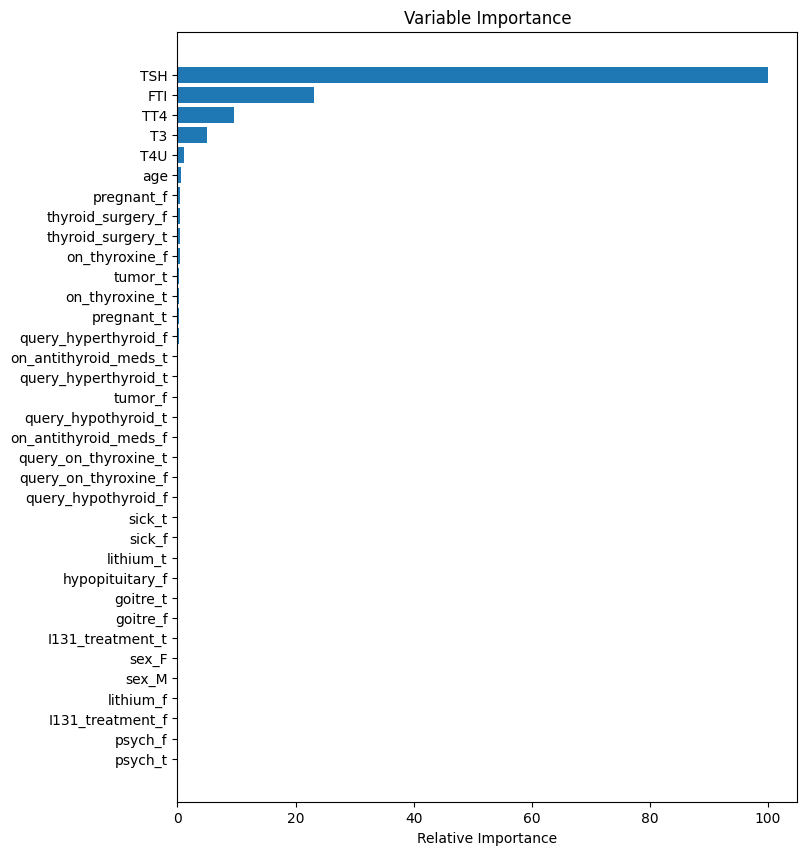

In [53]:
feature_importance = gbc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_processed.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()